In [78]:
import matplotlib.pyplot as plt
import alsDataManager

In [79]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_dict = dict(zip(methods, colors[:len(methods)]))

In [80]:
paths = [
    'ads_xgboost_t50.txt',
    'ads_xgboost_t100.txt',
    'ads_xgboost_t500.txt',
    'ads_xgboost_t1000.txt'
]

In [81]:
d = {}
for i, path in enumerate(paths):
    paths[i] = 'output/jsons/' + path

In [82]:
paths

['output/jsons/ads_xgboost_t50.txt',
 'output/jsons/ads_xgboost_t100.txt',
 'output/jsons/ads_xgboost_t500.txt',
 'output/jsons/ads_xgboost_t1000.txt']

In [83]:
d = alsDataManager.open_dict_from_json(paths[0])

In [84]:
ds = []
for path in paths:
    ds.append(alsDataManager.open_dict_from_json(path)['results'])
    

In [85]:
#keys0 = 'results'
keys1 = 'learning_method_similar_uncertainty_optimization'
keys2 = 'certainty_ratio_threshold_50'
keys3 = 'n_points_labeled_delete_300'
metric = 'accuracy'
metrics = ['accuracy', 'consistencies']

data = {}
data[keys1] = {}



for d in ds:
    threshold_key = list(d[keys1].keys())[0]
    data[keys1][threshold_key] = {}
    data[keys1][threshold_key][keys3] = {}

    for metric in metrics:
        column = d[keys1][threshold_key][keys3][metric].copy()
        data[keys1][threshold_key][keys3][metric] = column
    

In [86]:
path = 'output/jsons/xgboost_ads_single.txt'
plot_data = alsDataManager.open_dict_from_json(path)

In [87]:
plot_data[keys1] = data[keys1]

In [88]:
plot_data[keys1].keys()

dict_keys(['certainty_ratio_threshold_50', 'certainty_ratio_threshold_100', 'certainty_ratio_threshold_500', 'certainty_ratio_threshold_1000'])

In [91]:
plot_data[keys1]['certainty_ratio_threshold_50']['n_points_labeled_delete_300']

{'accuracy': [0.8393236714975846,
  0.8106280193236716,
  0.8159420289855073,
  0.8212560386473431,
  0.8183574879227054,
  0.8191304347826087,
  0.8210628019323669,
  0.8193236714975844,
  0.8171014492753622,
  0.8215458937198068,
  0.8232850241545894,
  0.8202898550724639,
  0.8221256038647345,
  0.8251207729468598,
  0.8247342995169082,
  0.8271497584541063,
  0.8243478260869566,
  0.8227053140096618,
  0.8259903381642513,
  0.8255072463768116,
  0.826086956521739,
  0.826280193236715,
  0.8285990338164252,
  0.8264734299516908,
  0.8269565217391304,
  0.8280193236714976,
  0.8301449275362319,
  0.8271497584541063,
  0.8310144927536232,
  0.8285024154589372,
  0.8289855072463768,
  0.8321739130434784,
  0.8255072463768116,
  0.831400966183575,
  0.8285990338164252,
  0.827342995169082,
  0.8325603864734299,
  0.8305314009661837,
  0.8301449275362319,
  0.8315942028985507,
  0.8361352657004831,
  0.8331400966183574,
  0.835072463768116,
  0.8323671497584542,
  0.8357487922705313,
  0

In [77]:
output_dict = {}
output_dict['results'] = plot_data
alsDataManager.save_dict_as_json(output_dict, 'ads_xgboost_ts.txt')

ValueError: not enough values to unpack (expected 2, got 0)

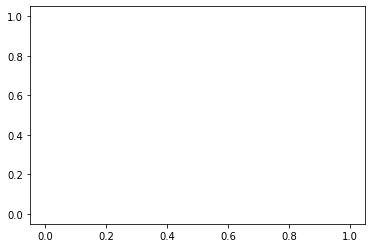

In [49]:
keys1 = list(d.keys())  # assumed to be learning methods
keys2 = list(d[keys1[0]].keys())  # assumed to be row variation
keys3 = list(d[keys1[0]][keys2[0]].keys())  # assumed to be column variation
keys4 = list(d[keys1[0]][keys2[0]][keys3[0]].keys())  # assumed to be performance metrics


n_rows = len(keys2)
n_cols = len(keys3)
methods = keys1
metrics = keys4
max_x = 625
max_y = 0.92
min_y = 0.88
N_DELETED = None
TITLE_STR = '? Dataset, n_keep = ?, reps = ?, pct_unlabeled_labeled = ? ,' + metric

#save_path_name = 'output/plots/' + metric + '_plotted_' + input_arguments[1].split('.')[0] + '.png'

fig, axs = plt.subplots(n_rows, n_cols)  # sharex=True, sharey=True)
fig, axs = plt.plot()
fig.set_size_inches(30, 20)
grid_element_initialized = False

#for metric in metrics:
metric = metrics[0]
    
    for method in methods:

        if not grid_element_initialized:
            if 'delete' in keys2[0]:
                n_deleted = int(keys2[i].split('_')[-1])  # get the number of deleted by splitting str
            elif 'delete' in keys3[0]:
                n_deleted = int(keys3[j].split('_')[-1])  # get the number of deleted by splitting str
            else:
                n_deleted = N_DELETED # TODO: alter this to be input parameter to plotting function
            
            if False:
                axs[i, j].set_xlim(0, max_x)
                axs[i, j].set_ylim(min_y, max_y)

                axs[i, j].axvline(x=n_deleted,
                                  color='maroon',
                                  alpha=0.5,
                                  label='# points deleted',
                                  linestyle='dotted')

                axs[i, j].axhline(y=d[method][keys2[i]][keys3[j]][metric][0],
                                  color='green',
                                  alpha=0.5,
                                  label='intitial ' + metric,
                                  linestyle='dotted')
            else:
                axs.set_xlim(0, max_x)
                axs.set_ylim(min_y, max_y)

                axs.axvline(x=n_deleted,
                                  color='maroon',
                                  alpha=0.5,
                                  label='# points deleted',
                                  linestyle='dotted')

                axs.axhline(y=d[method][keys2[i]][keys3[j]][metric][0],
                                  color='green',
                                  alpha=0.5,
                                  label='intitial ' + metric,
                                  linestyle='dotted')
            grid_element_initialized = True


        if False:
            axs[i, j].plot(d[method][keys2[i]][keys3[j]][metric],
                           # color=method_colors[method],
                           label='_'.join(method.split('_')[2:]),
                           alpha = 0.75)
        else:
            axs.plot(d[method][keys2[i]][keys3[j]][metric],
               # color=method_colors[method],
               label='_'.join(method.split('_')[2:]),
               alpha = 0.75)

    title = keys2 + ' | ' + keys3

    axs.set_title(title)

    if False:
        # iterates over all subplots:
        for ax in axs.flat:
            ax.set(xlabel='n points added', ylabel=metric)
            # ax.grid()
        # ax.label_outer()  # hides x labels and tick labels for top plots and y ticks for right plots.

        handles, labels = axs[0, 0].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        fig.legend(by_label.values(), by_label.keys(), loc='center right')

        fig.suptitle(TITLE_STR, fontsize=40)

        # fig.legend()
        fig.savefig(save_path_name, dpi=200)

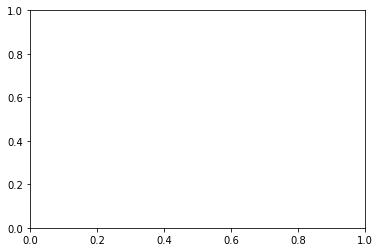

In [53]:
fig, axs = plt.subplots(1, 1)